# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset TMDb movies data was cleaned from the original data on kaggle. The original dataset from Kaggle is called TMDB 5000 Movies Dataset and you can find it [here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). 

This dataset contains information about 10,000 movies collected from The Movie Database(TMDd).

The dataset has in 21 columns which are listed below:

+ id(int): Represent the number of the movie
+ imdb_id (object): Representation in the database
+ popularity(float64): How the movie did(Very important)
+ budget(int64): Budget inhand for the movie(Very important)
+ revenue(int64): Revenue from the movie(Very important)
+ original_title(object): Movie name(Very important)
+ cast(object): People casted in the movie
+ homepage(object): Home website of the movie
+ director(object): Director of the movie(Very important)
+ tagline(object): tagline from the movie
+ keywords(object): keywords from the movie
+ overview(object): overview of the movie(Very important)
+ runtime(int64): runtime of the movie
+ genres(object): genre of the movie(Very important)
+ production_companies(object): production company of the movie
+ release_date(object): release date of the movie(Very important)
+ vote_count(int64): vote count of the movie
+ vote_average(float64): vote average of the movie
+ release_year(int64): release year of the movie
+ budget_adj(float64): budget adj of the movie

### Question(s) for Analysis
The questions I will be answering are 
+ Which genres are most prevalent from year to year? What kinds of properties are associated with that?
+ What is the movie with the most heightened revenue and most high profit? Then, extract other attributes regarding that movie.


In [5]:
# import packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#magic word to help in plotting the visualization
% matplotlib inline

In [64]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01 1% |▌                               | 174kB 9.1MB/s eta 0:00:02    38% |████████████▌                   | 4.1MB 27.3MB/s eta 0:00:01    90% |█████████████████████████████   | 9.5MB 28.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   11% |███▋                            | 1.5MB 26.5MB/s eta 0:00:01    20% |██████▍                         | 2.7MB 27.6MB/s eta 0:00:01    29% |█████████▌                      | 4.0MB 28.4MB/s eta 0:00:01    91% |█████████████████████████████▍  | 12.3MB 27.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling


In [7]:
# read the dataset
df = pd.read_csv("tmdb-movies.csv")

#### About Dataset

In [8]:
# Print few lines of the data to see how it is.
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


After running this code `!pip install --upgrade pandas==0.25.0`, this code `df.head(3)` produces an error. To resolve that you need to restart the kernel.

As we see, our dataset has 21 columns and manys row. We shall be able to know how many rows ahead. Currently, we can see our columns names, some data type of our attributes and thier formats. We shall be able to know many more about our data in our *data wrangling*.

**Forexample:** We can tell that the movie Jurassic World was directed by Colin Trevorrow, used 150M as a budget, was released on 6th of september 2015, and many more about the movie. 

In [14]:
#check the size of our dataset
df.shape

(10866, 21)

Our dataset has in total 10866 number of columns and 21 number of rows.

In [13]:
#print columns names
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

our dataset is a very big dataset and the code `df.head(3)` did not show all columns names. It very important for me to see all columns and have an idea of which attridutes I'm working with. 

In [12]:
#check data types of each column 
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We can clearly see that our dataset has a mixed data types. Eg.: Popularity is float, budget is integer, homepage is a mixed type, etc.

In [15]:
#Print the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

`df.info()` shows me the small summary of the dataset. It shows mme the data type, columns, non-null values and memory usage. From the output, I can see that some of the attactibutes have missing values like: homepage, tagline, cast, keywords, etc.

#### Distinct Element

In [16]:
#return numbers of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Comparing to the number of entries which is 10866, some columns have similar entries. This is not bad because in the movie indrusty one director can direct many movies forexample, and movies can be released on the some date.

In [19]:
#total number of distinct elemets
sum(df.nunique())

119205

The output shows the summation of all distinct elements in the dataset.

#### Missing Values

In [20]:
#check for missing values
df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The ouput show that the data has many missing values. Forexapmle the columns homepage and tagline have many missing number. We shall decide what to do in data clearning.

In [21]:
#count the missing values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The code `df.isnull()` did not give us better visualization or statistics of missing values. It was only showing True and False. 
But, adding a summation on it, gives us a better statistics of the data. We can now clearly see that the homepage and tagline are missing many entries. Choosing these can lead to bad analysis.

In [22]:
#filling missing values
df.fillna(0, inplace = True)

One of the safest way of dealing with the mssing values is to fill zeroes in those positions

In [23]:
#count the missing values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

We can then clearly see that we don't have missing values but in realistic some columns have entries which filling bad zeroes.

#### Dulpicates

In [24]:
# print the number of duplicatd rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
10841    False
10842    False
10843    False
10844    False
10845    False
10846    False
10847    False
10848    False
10849    False
10850    False
10851    False
10852    False
10853    False
10854    False
10855    False
10856    False
10857    False
10858    False
10859    False
10860    False
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

The output does not give us clear statistics of duplicates in our dataset. It only shows the first five and the last five, and all are not duplicates. We need to find the way of knowing our duplicates.

In [25]:
#total number of duplicates
sum(df.duplicated())

1

We can clearly see that we have only one duplicated row, which is not bad. We can then drop our duplicate

In [26]:
#Drop duplicates 
df.drop_duplicates(inplace = True)

In [27]:
#total number of duplicates
sum(df.duplicated())

0

After droping the duplicate can can clearly see that we don't have duplicates anymore.

#### Data Statistics

In [28]:
#print descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The output about anoly returns the statistic of columns with only int or float as data types. It doesnot returns the statistics of mixed types.  We can tell some of the statistic like the max amount spent on the movie is 4.25e+08


### Data Cleaning

In [29]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

To do better cleanning while focusing to what I extractly need, need to first select the columns I need in my analysis and drop the rest

In [30]:
#Delete unwanted columns
df.drop(columns=["id", "imdb_id", "cast", "homepage", "director", "tagline", "keywords", 
                 "production_companies", "budget_adj", "revenue_adj"], inplace = True)

To rerun this cell without giving an error you have to run the reading data cell first `df = pd.read_csv("tmdb-movies.csv")`

In [32]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'overview',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

I have deleted the following columns `["id", "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "production_companies", "budget_adj", "revenue_adj"]` because I don't think I will need them while answering the questions I asked my self.

In [33]:
#revenue entries equal to zero
sum(df.revenue == 0)

6016

In [34]:
#budget entries equal to zero
sum(df.budget == 0)

5696

In [35]:
# read the revenue and the budget entries
df.budget, df.revenue

(0        150000000
 1        150000000
 2        110000000
 3        200000000
 4        190000000
 5        135000000
 6        155000000
 7        108000000
 8         74000000
 9        175000000
 10       245000000
 11       176000003
 12        15000000
 13        88000000
 14       280000000
 15        44000000
 16        48000000
 17       130000000
 18        95000000
 19       160000000
 20       190000000
 21        30000000
 22       110000000
 23        40000000
 24        28000000
 25       150000000
 26        68000000
 27        81000000
 28        20000000
 29        61000000
            ...    
 10836            0
 10837            0
 10838            0
 10839            0
 10840            0
 10841        75000
 10842            0
 10843            0
 10844            0
 10845            0
 10846            0
 10847            0
 10848      5115000
 10849            0
 10850            0
 10851            0
 10852            0
 10853            0
 10854            0


It is clear that some movies have revenues and budget equal to zero and realisticaly it is imposible.
Those entries are needed to be droped

In [36]:
# drop entries budget equal to zero
df = df[df.budget != 0]

In [37]:
# drop entries budget equal to zero
df = df[df.revenue != 0]

In [39]:
#revenue, budget entries equal to zero
sum(df.revenue == 0), sum(df.budget == 0)

(0, 0)

After droping them our dataset have only data with no zero revenue and budget movies.

In [40]:
# Our dataset now is (Columns and rows)
df.shape

(3854, 11)

Another thing we can change is our movies column name. The word original title is confusing

In [41]:
#change the column name of movies
df.rename(columns= {"original_title":"movie_name"}, inplace = True)

In [42]:
#check the column names
df.columns

Index(['popularity', 'budget', 'revenue', 'movie_name', 'overview', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year'],
      dtype='object')

Another column to look at is the genres column.

In [45]:
#read the genres column
df.genres

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

The genre column is a comprex column and is one of my target column to help me answer the first question.
To answer perfectly my first question I need to split the genres of the movies

In [47]:
df.head(3)

,popularity,budget,revenue,movie_name,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015


In [43]:
#The function to help us coont movie genres
def genres_count(column):
    genres_count = df[column].str.cat(sep = '|') # sprit all genres movie by movie'|'
    genres_count = pd.Series(genres_count.split('|')) # save every sprited genre
    genres = genres_count.value_counts(ascending = False) # Setting in a dipping directive
    
    return genres

In [46]:
#variable to store the retured value
genres_count('genres')

Drama              4821
Thriller           3896
Action             3774
Comedy             3648
Adventure          2755
Crime              2184
Romance            1961
Science Fiction    1818
Family             1481
Fantasy            1463
Horror             1245
Mystery            1197
Animation           728
Music               434
History             403
War                 391
Western             170
Documentary          56
Foreign              42
TV Movie              4
dtype: int64

We need now to save this in our dataset table.

In [48]:
# split the genres of the movies and save in our dataset
df1 = df[df['genres'].notna()]
df = df1.drop('genres', axis=1).join(df1['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
df.head(20)

,popularity,budget,revenue,movie_name,overview,runtime,release_date,vote_count,vote_average,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Adventure
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Science Fiction
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Thriller
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,Adventure
2,13.112507,110000000,295238201,Insurgent,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,Science Fiction


In [49]:
#read the genres column
df.genres

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
1              Adventure
1        Science Fiction
1               Thriller
2              Adventure
2        Science Fiction
2               Thriller
3                 Action
3              Adventure
3        Science Fiction
3                Fantasy
4                 Action
4                  Crime
4               Thriller
5                Western
5                  Drama
5              Adventure
5               Thriller
6        Science Fiction
6                 Action
6               Thriller
6              Adventure
7                  Drama
7              Adventure
7        Science Fiction
8                 Family
              ...       
10779             Comedy
10779              Drama
10780             Horror
10780           Thriller
10780    Science Fiction
10780            Mystery
10788          Adventure
10788             Family
10788            Fantasy


In [50]:
#read shape of the dataset
df.shape

(10303, 11)

Clearly, spliting the genres of the movies has created many entries, but it is okay. The different genres will help us in the first question.

In [51]:
df.head()

,popularity,budget,revenue,movie_name,overview,runtime,release_date,vote_count,vote_average,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Action


#### I now have a cleaned dataset which can help me answer all my question without problems.

Before starting my Exploratory Data Analysis(EDA), I need to visualize and extract all the information of my dataset.

To do this I can create function that can help me extract everything.

In [52]:
#extract dataset information
def information(df):
    print(" Our dataset has the following number of Columns and Rows",df.shape)
    print("We have the following columns",df.columns)
    print("My attributes have the following data types ",df.dtypes)
    print("Here is the brief summary of my dataset", df.info())
    print("My dataset have the following number of following attributes",df.nunique())
    print("My dataset have the following missing values",df.isnull().sum())
    print("My dataset have this number of duplicates",df.duplicated())

In [53]:
# Read information
information(df)

 Our dataset has the following number of Columns and Rows (10303, 11)
We have the following columns Index(['popularity', 'budget', 'revenue', 'movie_name', 'overview', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'genres'],
      dtype='object')
My attributes have the following data types  popularity      float64
budget            int64
revenue           int64
movie_name       object
overview         object
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
genres           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10303 entries, 0 to 10848
Data columns (total 11 columns):
popularity      10303 non-null float64
budget          10303 non-null int64
revenue         10303 non-null int64
movie_name      10303 non-null object
overview        10303 non-null object
runtime         10303 non-null int64
release_date    10303 non-null object
vote_count      10303 n

These information `information(df)` will help me write my summary.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genres are most prevalent from year to year? What kinds of properties are associated with that?

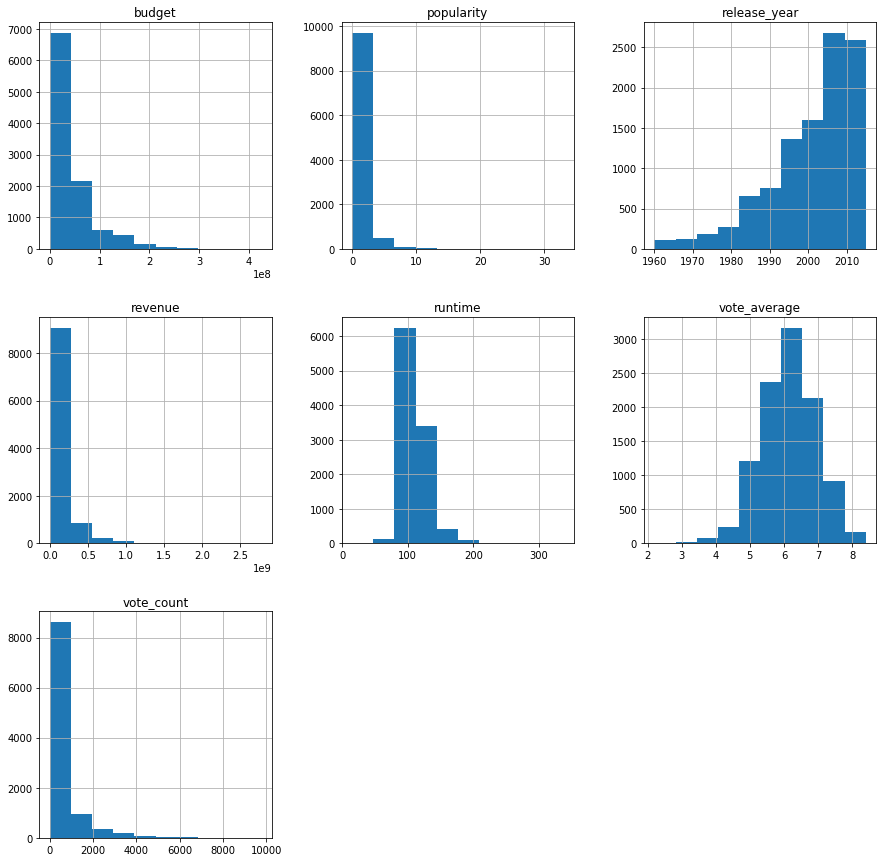

In [54]:
df.hist(figsize=(15,15));

Some of the interesting outcomes from the graphs are:
+ Many movies were released from year 2000 going up.
+ Many poeple were giving the avarage vote between 5 and 7

In [55]:
#count each mivie the genre
genres_count = df["genres"].value_counts()
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
Name: genres, dtype: int64

Text(0,0.5,'genres')

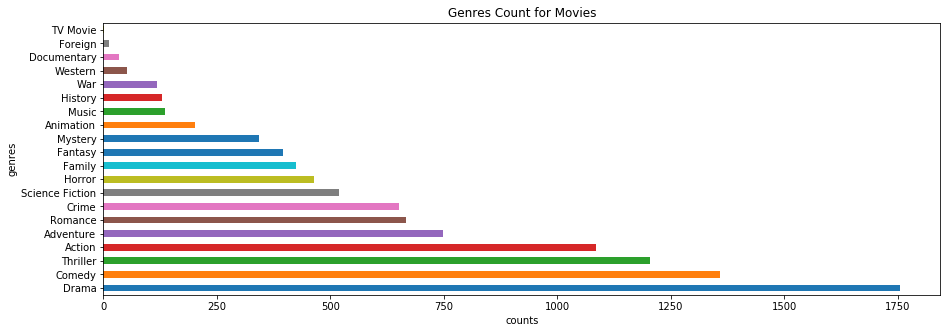

In [56]:
#grapg of the genres count
genres_count.plot(x='genres', kind='barh', figsize=(15, 5), title='Genres Count for Movies');
plt.xlabel('counts')
plt.ylabel('genres')

The graph clearly show how Drama is the higher rated genre.

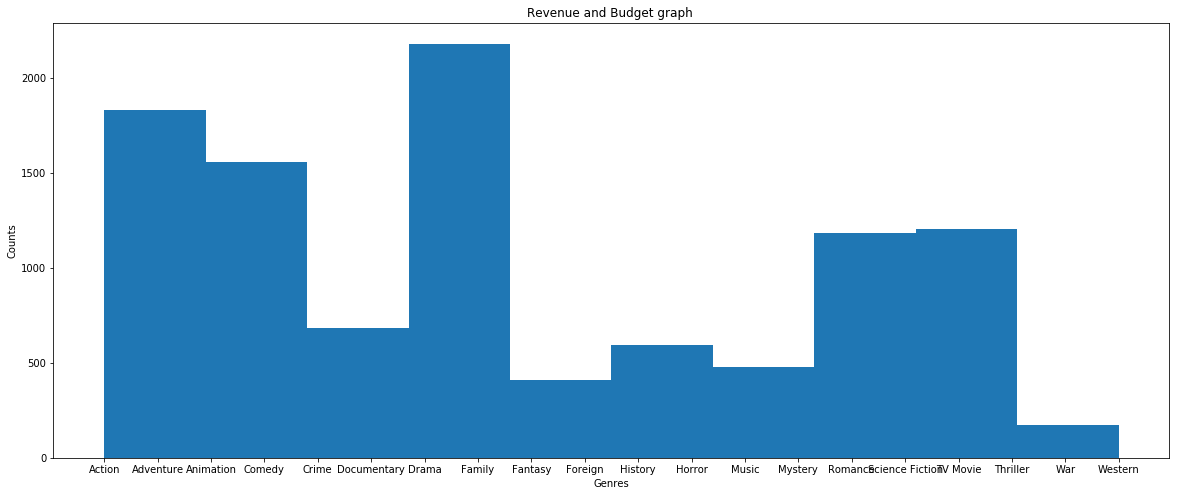

In [57]:
#Plot the number of movies and the genres
plt.figure(figsize=(20,8))
plt.hist(df["genres"])
plt.title("Revenue and Budget graph ")
plt.xlabel('Genres')
plt.ylabel('Counts');

Without considering the dates, the data shows that Dram genre have more movie than other followed by Comedy.

In [58]:
# counting genres for every movie
count_vote = {}
for votes in df['movie_name']:
    if votes in count_vote:
        count_vote[votes] += 1 
    else: count_vote[votes] = 1

In [59]:
count_vote

{'Jurassic World': 4,
 'Mad Max: Fury Road': 4,
 'Insurgent': 3,
 'Star Wars: The Force Awakens': 4,
 'Furious 7': 3,
 'The Revenant': 4,
 'Terminator Genisys': 4,
 'The Martian': 3,
 'Minions': 4,
 'Inside Out': 3,
 'Spectre': 3,
 'Jupiter Ascending': 4,
 'Ex Machina': 2,
 'Pixels': 3,
 'Avengers: Age of Ultron': 3,
 'The Hateful Eight': 4,
 'Taken 3': 3,
 'Ant-Man': 3,
 'Cinderella': 4,
 'The Hunger Games: Mockingjay - Part 2': 3,
 'Tomorrowland': 5,
 'Southpaw': 2,
 'San Andreas': 3,
 'Fifty Shades of Grey': 2,
 'The Big Short': 2,
 'Mission: Impossible - Rogue Nation': 1,
 'Ted 2': 1,
 'Kingsman: The Secret Service': 4,
 'Spotlight': 3,
 'Maze Runner: The Scorch Trials': 3,
 'Chappie': 3,
 'Pitch Perfect 2': 2,
 'Bridge of Spies': 2,
 'Goosebumps': 3,
 'Room': 2,
 'The Good Dinosaur': 5,
 'Run All Night': 5,
 'Brooklyn': 2,
 'Straight Outta Compton': 2,
 'The Last Witch Hunter': 3,
 'Steve Jobs': 2,
 'The Man from U.N.C.L.E.': 3,
 'The Age of Adaline': 3,
 'Hardcore Henry': 3,
 'Ho

Movies have not only one genre associated with them but two or more. 

+ Movie like Jurassic World is in 4 genres: Action, Adventure, Science Fiction and Thriller.
+ Movies like Fantastic Four is associated with 7 genres.

### Research Question 2: What is the movie with the most heightened revenue and most high profit? Then, extract other attributes regarding that movie.

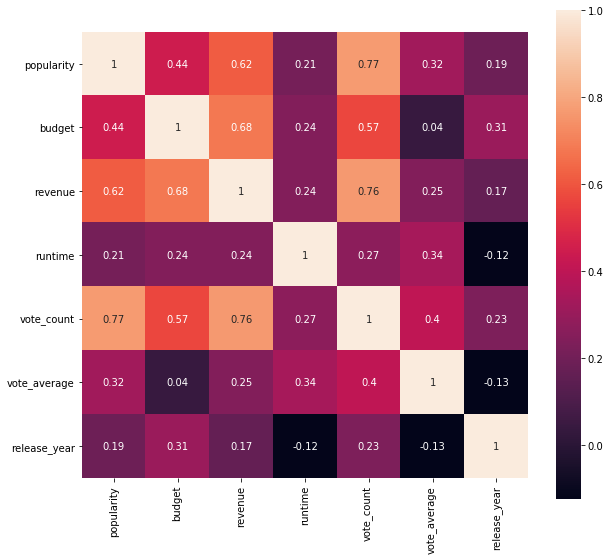

In [60]:
#creating heatmap for the attridutes
heat_map = df.corr() 
_, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(heat_map, cbar_kws={ 'shrink' : .9 }, annot = True, square=True);

+ The heatmap clearly show how revenue is highly correlated with attributes like vote_count, budget, and popularity. It will be interesting to visualize these to understand where these correlation come from. 

+ The revenue is less correleted with release year, vote avaragee, and runtime. It is not good to consider these for analysis of revenue.

+ The budget is highly correlated with revenue, vote count and popularity.  I will be considering them in my analysis of budget.

+ The budget is less correlated with vote average and runtime. So, I won't be considering both of them in my analysis of budget.

#### Revenue Analysis

Text(0,0.5,'Revenue Made')

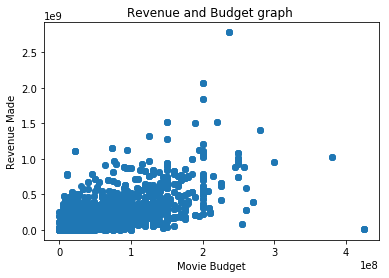

In [61]:
#scatter plot from revenue and budget
plt.scatter(df['budget'],df['revenue'])

plt.title("Revenue and Budget graph ")
plt.xlabel('Movie Budget')
plt.ylabel('Revenue Made')

The graph show that the higher budget you have the higher revenue you make.

In [62]:
df.head(3)

,popularity,budget,revenue,movie_name,overview,runtime,release_date,vote_count,vote_average,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Science Fiction


Text(0,0.5,'vote count')

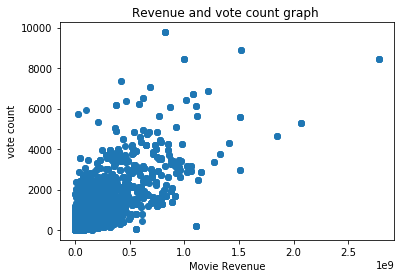

In [63]:
#scatter plot from revenue and vote count
plt.scatter(df['revenue'],df['vote_count'])

plt.title("Revenue and vote count graph ")
plt.xlabel('Movie Revenue')
plt.ylabel('vote count')

The graph show the higher the revenue received from the movie the higher the vote count.

Text(0,0.5,'Popularity')

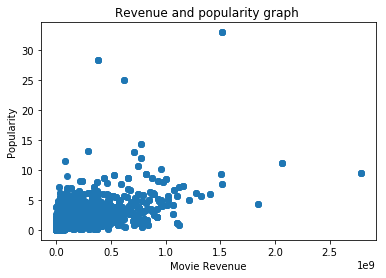

In [64]:
#scatter plot from revenue and popularity
plt.scatter(df['revenue'],df['popularity'])

plt.title("Revenue and popularity graph ")
plt.xlabel('Movie Revenue')
plt.ylabel('Popularity')

The graph show the higher the revenue received from the movie the higher the population was.

In [65]:
#sort the from the highest to lowest
rev= pd.DataFrame(df['revenue'].sort_values(ascending=False))
rev.head()

,revenue
1386,2781505847
1386,2781505847
1386,2781505847
1386,2781505847
3,2068178225


In [66]:
#prevalent movies
df2 = df.groupby('release_year')['revenue'].sum()

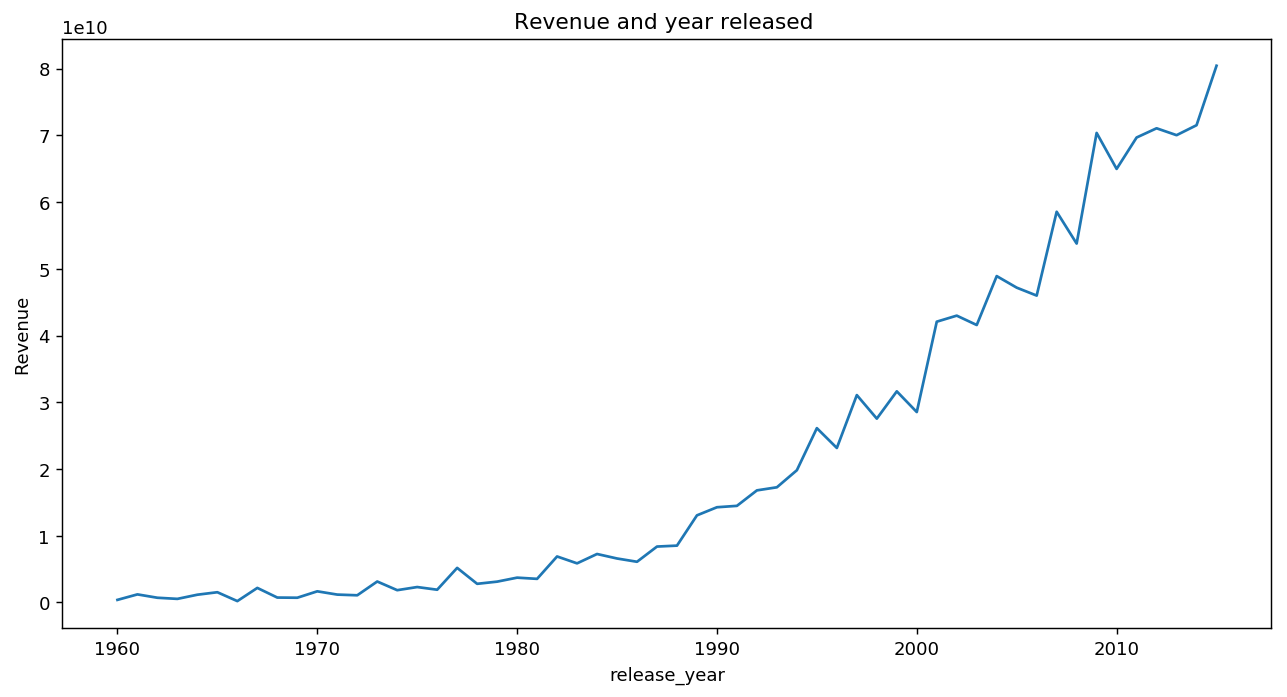

In [67]:
#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)
#plotting the graph
plt.plot(df2)
plt.title("Revenue and year released ")
plt.xlabel('release_year')
plt.ylabel('Revenue')
plt.show()

The graph clearly show that companies didn't use the spent alot of money in 19s, but the more the spent money the more the revenue the got form the movies.

#### Budget Analysis

Text(0,0.5,'vote_count')

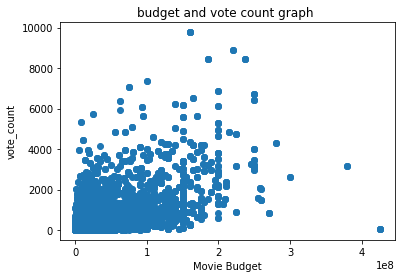

In [68]:
#scatter plot from budget and vote count
plt.scatter(df['budget'],df['vote_count'])

plt.title("budget and vote count graph ")
plt.xlabel('Movie Budget')
plt.ylabel('vote_count')

The graph show the higher the budget used lead to the higher votes.

Text(0,0.5,'popularity')

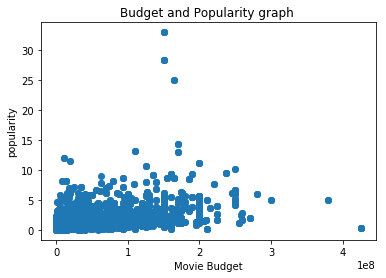

In [69]:
#scatter plot from budget and popularity
plt.scatter(df['budget'],df['popularity'])

plt.title("Budget and Popularity graph ")
plt.xlabel('Movie Budget')
plt.ylabel('popularity')

The graph show good view about the popularity. Without considering the aliases,the popuration is usually less than 15. 
The comparison between the population and the budget show that the budget usualy pays around 3,1e8 and more or less gets 15 popularity. 

We need a histogram to tell exactly the budget.


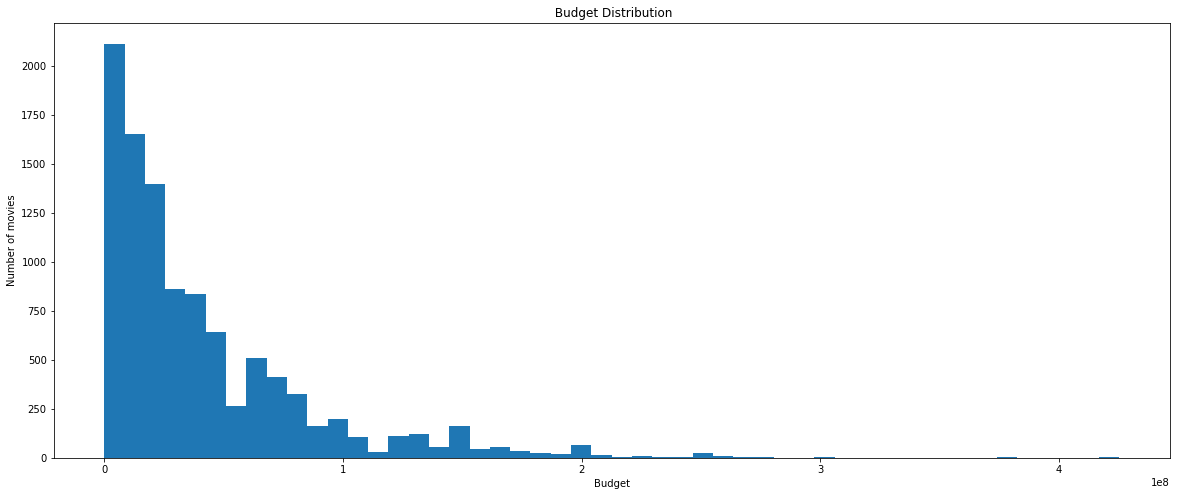

In [70]:
#histogram for budget
plt.figure(figsize=(20,8))
plt.hist(df['budget'],bins= 50)
plt.title(" Budget Distribution")
plt.xlabel('Budget')
plt.ylabel('Number of movies')
plt.show()

From the graph, we can clearly see that the budegt is around 1 billions

#### Revenue and Budget Analysis

In [71]:
df.head()

,popularity,budget,revenue,movie_name,overview,runtime,release_date,vote_count,vote_average,release_year,genres
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,Action


In [72]:
# movies with higher popularity 
popular_movies = df.nlargest(n=30,columns='popularity')[['movie_name','popularity']]
popular_movies.head(10)

,movie_name,popularity
0,Jurassic World,32.985763
0,Jurassic World,32.985763
0,Jurassic World,32.985763
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
1,Mad Max: Fury Road,28.419936
1,Mad Max: Fury Road,28.419936
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
629,Interstellar,24.949134


From the statistics, It looks like Jurassic World is the most popular movie with 32.9 popularity follwed by Mad Max: Fury Road with 28.4 popularity. The movie is repeated 4 times because it a 4 genres movie. 

In [73]:
# movies with lowest popularity 
lower_popular_movies = df.sort_values('popularity',ascending=True)[['movie_name','popularity']]
lower_popular_movies.head(8)

,movie_name,popularity
7268,Born into Brothels,0.001117
6065,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,0.010335
6065,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,0.010335
8066,Spacehunter: Adventures in the Forbidden Zone,0.015727
8066,Spacehunter: Adventures in the Forbidden Zone,0.015727
8883,The In Crowd,0.015997
10218,The Bad News Bears,0.017498
10218,The Bad News Bears,0.017498


The movie with lowest popularity is Born into Brothels with 0.0011 popularity. 

In [74]:
# movies with higher revenue
high_revenue_movies = df.nlargest(n=30,columns='revenue')[['movie_name','revenue']]
high_revenue_movies.head(10)

,movie_name,revenue
1386,Avatar,2781505847
1386,Avatar,2781505847
1386,Avatar,2781505847
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
3,Star Wars: The Force Awakens,2068178225
3,Star Wars: The Force Awakens,2068178225
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
5231,Titanic,1845034188


The results show that the Avatar movie got the highest revenue, which is around 2B.

In [75]:
# movies with lowest revenue 
lower_popular_movies = df.sort_values('revenue',ascending=True)[['movie_name','revenue']]
lower_popular_movies.head(8)

,movie_name,revenue
8142,Mallrats,2
5067,Shattered Glass,2
5067,Shattered Glass,2
8142,Mallrats,2
3239,Dr. Horrible's Sing-Along Blog,3
3239,Dr. Horrible's Sing-Along Blog,3
3239,Dr. Horrible's Sing-Along Blog,3
3239,Dr. Horrible's Sing-Along Blog,3


The movies with the lowest revenues are Mallrats and Shattered Glass.

Before I write my summary, I need to extract all information of my data to get the reference.

To do this I use the function I create `information(df)` to give me all information at once.

In [76]:
# Read information
information(df)

 Our dataset has the following number of Columns and Rows (10303, 11)
We have the following columns Index(['popularity', 'budget', 'revenue', 'movie_name', 'overview', 'runtime',
       'release_date', 'vote_count', 'vote_average', 'release_year', 'genres'],
      dtype='object')
My attributes have the following data types  popularity      float64
budget            int64
revenue           int64
movie_name       object
overview         object
runtime           int64
release_date     object
vote_count        int64
vote_average    float64
release_year      int64
genres           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10303 entries, 0 to 10848
Data columns (total 11 columns):
popularity      10303 non-null float64
budget          10303 non-null int64
revenue         10303 non-null int64
movie_name      10303 non-null object
overview        10303 non-null object
runtime         10303 non-null int64
release_date    10303 non-null object
vote_count      10303 n

<a id='conclusions'></a>
## Conclusions

1. Data Wrangling

The dataset was more or less cleaned. Then, I did some basic statistical visualization of the data to see and understand what I could do about it. For example, the dataset had 10866 rows and 21 columns, but I don't think I needed all of them from my analysis. I also had duplicated row, which  I deleted, and some missing values, which I replaced with zeroes. Finally, I was about to visualize the statistics summary of my data, and I got a better idea of the question I could ask myself.  

I then asked myself these questions after Data Wrangling

  + Which genres are most prevalent from year to year? What kinds of properties are associated with that?
  + What is the movie with the most heightened revenue and most high profit? Then, extract other attributes regarding that movie.

2. Data Cleaning

First and foremost, I deleted columns  I thought weren't necessary for my analysis; columns like id, homepage, tagline, etc., weren't going to help me answer my questions. Secondly, I deleted movies with zero budget and zero revenue because it doesn't make sense for a film to have zero budget and zero revenue. Thirdly I changed the original movie column name to movie name because it is more apparent to me. Fourthly I sprit the movies' genres because this would answer my questions. 
I then got an immaculate data set to help answer all my questions. The data was of 10303 rows and 11 columns. 

3. EDA

The process of EDA was to help me answer the questions I asked myself after data wrangling. I started with the first question 
and then the second one.

I took mainly the following steps while answering my two questions.

  + Visualize the relationship between my target attribute(for example, question 1: genre ) and other attributes.
  + Visualize why my target attribute behaves concerning other features.
  + Finally, extract relevant information to answer my questions.
  
Following are some insights extracted after analysis.

#### Research Question 1: Which genres are most prevalent from year to year? What kinds of properties are associated with that?

###### Some of the interesting outcomes from the analysis are:

   + Many movies were released from year 2000 going up.
   + Many poeple were giving the avarage vote between 5 and 7 
   + The graph clearly show how Drama is the higher rated genre.
   + Movies have not only one genre associated with them but two or more.
       + Movie like Jurassic World is in 4 genres: Action, Adventure, Science Fiction and Thriller.
       + Movies like Fantastic Four is associated with 7 genres.
   + One of the outstanding proparty of these movies is that the have a vote between 5 and 7 

#### Research Question 3: What is the movie with the most heightened revenue and most high profit? Then, extract other attributes regarding that movie.

###### Some of the interesting outcomes from the analysis are:

  + Revenue is highly correlated with attributes like vote_count, budget, and popularity, and less correleted with release year, vote avaragee, and runtime.
  + The budget is highly correlated with revenue, vote count and popularity and less correlated with vote average and runtime. 
  + The higher budget you have the higher revenue you make.
  + The higher the revenue received from the movie the higher the vote count.
  + The higher the revenue received from the movie the higher the population was.
  + The companies didn't use the spent alot of money in 19s, but the more the spent money the more the revenue the got form the movies.
  + Jurassic World is the most popular movie with 32.9 popularity follwed by Mad Max: Fury Road with 28.4 popularity. The movie is repeated 4 times because it a 4 genres movie
  + Most movies budegt were around 1 billions
  + The movie with lowest popularity is Born into Brothels with 0.0011 popularity.
  + tThe Avatar movie got the highest revenue, which is around 2B.
  + The movies with the lowest revenues are Mallrats and Shattered Glass.
  
###### Addition research

The analysis was done for learning purposes, so we didn't exhaust the study of the dataset. We could have extracted many things like profits from the movies, people who casted the film, directors of popular movies, the statistic of each movie runtime, etc., even producing machine learning models to learn from the data.
  
###### Limitation

The dataset is an old dataset. It does not have the entries for recent movies like Spider-Man No Way Home or Avengers: End Game. These movies could give us a spirit that may show the increase of revenue of the movies, like how it was from the movie releases in the 1900s and 2000s.

## Submitting your Project 

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0